# Data Preparation

In [13]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Science/Time Series Forecasting Product/Practice

/content/drive/MyDrive/Colab Notebooks/Data Science/Time Series Forecasting Product/Practice


In [14]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('data.csv')
df.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [16]:
#Rename variable
df = df.rename(columns = {'Demand': 'y',
                          'Date': 'ds'})
df.head(0)

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing


In [17]:
# Transforming the date variable: YYYY-MM-DD
df.ds = pd.to_datetime(df.ds, format = "%m/%d/%Y")

In [18]:
# Easter Holiday
dates = df[df.Easter == 1].ds
easter = pd.DataFrame({'holiday': 'easter',
                       'ds': dates,
                       'lower_window': -5,
                       'upper_window': 2})
easter

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2


In [19]:
# Remaining Holidays
# Thanksgiving
dates = df[df.Thanksgiving == 1].ds
thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
                       'ds': dates,
                       'lower_window': -3,
                       'upper_window': 5})

#Christmas
dates = df[df.Christmas == 1].ds
christmas = pd.DataFrame({'holiday': 'christmas',
                       'ds': dates,
                       'lower_window': -7,
                       'upper_window': 7})

In [20]:
# Combine all events
holidays = pd.concat([easter, thanksgiving, christmas])
holidays.head()

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2


In [21]:
# Drop holidays from df
df_final = df.drop(columns = ["Easter", "Thanksgiving", "Christmas"])
df_final.head()

,ds,y,Temperature,Marketing
0,2015-01-01,720.000885,3.68,41.305
1,2015-01-02,581.276773,4.73,131.574
2,2015-01-03,754.117039,7.23,162.700
3,2015-01-04,622.252774,10.96,160.281
4,2015-01-05,785.373319,6.92,51.077


# Cross Validation

In [22]:
from prophet import Prophet

In [23]:
# Building the model
m = Prophet(holidays = holidays,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)
m.add_regressor("Temperature")
m.add_regressor("Marketing")
m.fit(df_final)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/j8hwwe25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/m1dg0z2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81736', 'data', 'file=/tmp/tmp6cbyudwm/j8hwwe25.json', 'init=/tmp/tmp6cbyudwm/m1dg0z2w.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modele2ic96l9/prophet_model-20241026142240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
from prophet.diagnostics import cross_validation

In [25]:
# number of days in the data set
df.shape[0] - 180

2012

In [26]:
# Cross-Validation
df_cv = cross_validation(model = m,
                         horizon = '31 days', # length of test set
                         period = '16 days', # in-between period of test data. Forecasts made every 16 days
                         initial = '2012 days', # start of cross validation
                         parallel = 'processes')
df_cv.head()

INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7669d578b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/syfif2di.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/8f_n0kyi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/g7_1a_wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/b3669ucz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/1axodbt5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/c_8cjecu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/jo3fqhuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/am_7n9rm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/o93575jq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/01wjtud0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/hwfmaykn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-10,607.600343,538.776288,673.106332,571.069531,2020-07-09
1,2020-07-11,722.756372,653.764779,783.149511,677.106981,2020-07-09
2,2020-07-12,637.709391,572.231395,706.103584,619.572774,2020-07-09
3,2020-07-13,769.901813,703.839010,839.276799,808.932621,2020-07-09
4,2020-07-14,637.317035,568.206296,707.514768,661.791644,2020-07-09


In [27]:
# Look at the output
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-10,607.600343,538.776288,673.106332,571.069531,2020-07-09
1,2020-07-11,722.756372,653.764779,783.149511,677.106981,2020-07-09
2,2020-07-12,637.709391,572.231395,706.103584,619.572774,2020-07-09
3,2020-07-13,769.901813,703.839010,839.276799,808.932621,2020-07-09
4,2020-07-14,637.317035,568.206296,707.514768,661.791644,2020-07-09


In [28]:
# Performance metrics
from prophet.diagnostics import performance_metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2816.526046,53.070953,43.585827,0.059121,0.060690,0.060220,0.800000
1,5 days,2798.611929,52.901909,44.378974,0.062103,0.062914,0.062893,0.800000
2,6 days,3493.372151,59.104756,50.206298,0.069428,0.062736,0.070839,0.735484
3,7 days,2784.063423,52.764225,42.607514,0.060086,0.059503,0.061128,0.735484
4,8 days,2718.948136,52.143534,40.120799,0.055470,0.058671,0.056952,0.735484


In [29]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)["rmse"].mean(),1)
mape = round(performance_metrics(df_cv)["mape"].mean() * 100,3)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 54.1
The MAPE is 5.864 %


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


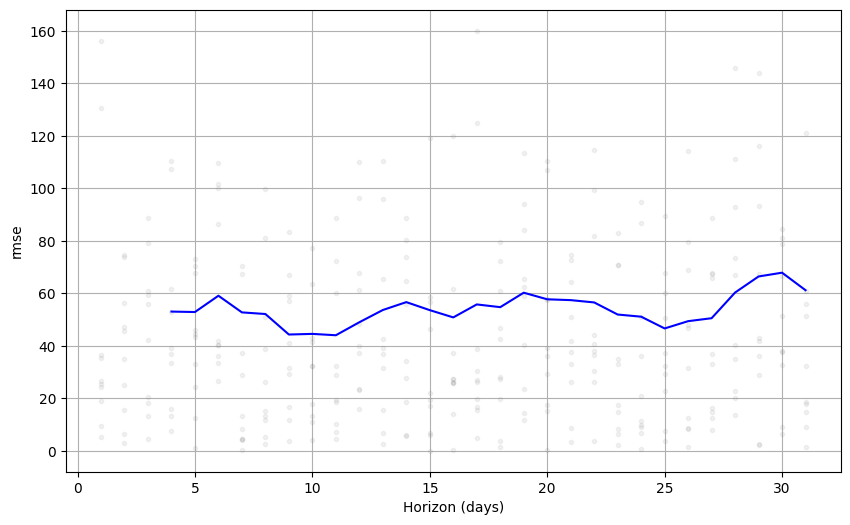

In [30]:
# Plotting the performance metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'rmse');

In [31]:
from sklearn.model_selection import ParameterGrid
param_grid = {'seasonality_mode': ["additive", "multiplicative"],
              'seasonality_prior_scale': [5, 10, 20],
              'holidays_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1]}
grid = ParameterGrid(param_grid)
print(len(list(grid)))
print(list(grid))

54
[{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonalit

In [32]:
# Store the results
rmse = []
i = 0

#loop
for params in grid:
  print(f"{i} out of {len(list(grid))}")
  # model
  # Building the model
  m = Prophet(holidays = holidays,
              seasonality_mode = params['seasonality_mode'],
              seasonality_prior_scale = params['seasonality_prior_scale'],
              holidays_prior_scale = params['holidays_prior_scale'],
              changepoint_prior_scale = params['changepoint_prior_scale'])
  m.add_regressor("Temperature")
  m.add_regressor("Marketing")
  m.fit(df_final)

  # CV
  df_cv = cross_validation(model = m,
                          horizon = '31 days',
                          period = '16 days',
                          initial = '2012 days',
                          parallel = 'processes')

  # Measure and store error
  error = round(performance_metrics(df_cv)["rmse"].mean(),1)
  rmse.append(error)

  i += 1

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/xgiz94uc.json


0 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/1ijonrjz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34760', 'data', 'file=/tmp/tmp6cbyudwm/xgiz94uc.json', 'init=/tmp/tmp6cbyudwm/1ijonrjz.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelm7daef4p/prophet_model-20241026142245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f578220>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/kg0i2w43.json
DEBUG:cmdstanpy:input tempfile:

1 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/iwk3s3v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63031', 'data', 'file=/tmp/tmp6cbyudwm/0p14vlwk.json', 'init=/tmp/tmp6cbyudwm/iwk3s3v7.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelllmpazlv/prophet_model-20241026142247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7669fc7b20>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/bskq96py.json
DEBUG:cmdstanpy:input tempfile:

2 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/sx23mfhs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28888', 'data', 'file=/tmp/tmp6cbyudwm/8u0_kwtn.json', 'init=/tmp/tmp6cbyudwm/sx23mfhs.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelzkt2wm73/prophet_model-20241026142250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a766064e7d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/82pp6k_o.json
DEBUG:cmdstanpy:input tempfile:

3 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/e79pj0wh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30169', 'data', 'file=/tmp/tmp6cbyudwm/bjbwsik4.json', 'init=/tmp/tmp6cbyudwm/e79pj0wh.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model7ranipqz/prophet_model-20241026142252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a766a2ae200>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/9jyb5h5d.json
DEBUG:cmdstanpy:input tempfile:

4 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/uu94veup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23629', 'data', 'file=/tmp/tmp6cbyudwm/5l1y3_cg.json', 'init=/tmp/tmp6cbyudwm/uu94veup.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model3x0ul3qu/prophet_model-20241026142254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f5790c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/xu4zm340.json
DEBUG:cmdstanpy:input tempfile:

5 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/10z9msf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22066', 'data', 'file=/tmp/tmp6cbyudwm/gtppxg3m.json', 'init=/tmp/tmp6cbyudwm/10z9msf_.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelxfwqb3se/prophet_model-20241026142257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f3a8970>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/5364821e.json
DEBUG:cmdstanpy:input tempfile:

6 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/jfyoisdt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31326', 'data', 'file=/tmp/tmp6cbyudwm/tu34peyf.json', 'init=/tmp/tmp6cbyudwm/jfyoisdt.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model12k66h37/prophet_model-20241026142259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f573dc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/x9ngggwi.json
DEBUG:cmdstanpy:input tempfile:

7 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/4yer43f7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69288', 'data', 'file=/tmp/tmp6cbyudwm/zl5rptt_.json', 'init=/tmp/tmp6cbyudwm/4yer43f7.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelkq2pvfpj/prophet_model-20241026142301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a766a2af0d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/sy21ato6.json
DEBUG:cmdstanpy:input tempfile:

8 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/c34gusx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40941', 'data', 'file=/tmp/tmp6cbyudwm/r3gysvsh.json', 'init=/tmp/tmp6cbyudwm/c34gusx2.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelc1rj8a_6/prophet_model-20241026142304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7669f53b50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/3799rmag.json
DEBUG:cmdstanpy:input tempfile:

9 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/5e7rw7ax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85467', 'data', 'file=/tmp/tmp6cbyudwm/gdne58k9.json', 'init=/tmp/tmp6cbyudwm/5e7rw7ax.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelaco2s3b1/prophet_model-20241026142306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f572e60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/d971s2mv.json
DEBUG:cmdstanpy:input tempfile:

10 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/gqz8rwsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71951', 'data', 'file=/tmp/tmp6cbyudwm/ekoi9d89.json', 'init=/tmp/tmp6cbyudwm/gqz8rwsp.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelkcxcowff/prophet_model-20241026142308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f573dc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/upbsyk4k.json
DEBUG:cmdstanpy:input tempfile:

11 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/7q3cgsci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11528', 'data', 'file=/tmp/tmp6cbyudwm/j986ulza.json', 'init=/tmp/tmp6cbyudwm/7q3cgsci.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelkjm65ykd/prophet_model-20241026142311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7660695fc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/0tx7z88a.json
DEBUG:cmdstanpy:input tempfile:

12 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/uncg755m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26543', 'data', 'file=/tmp/tmp6cbyudwm/8bzmb6eu.json', 'init=/tmp/tmp6cbyudwm/uncg755m.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelogcw21nv/prophet_model-20241026142313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f6ccac0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/yleez6oj.json
DEBUG:cmdstanpy:input tempfile:

13 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/r4u53xln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5146', 'data', 'file=/tmp/tmp6cbyudwm/x2fe7f9u.json', 'init=/tmp/tmp6cbyudwm/r4u53xln.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model35byjhql/prophet_model-20241026142315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a76605d6b30>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/z8ox11id.json
DEBUG:cmdstanpy:input tempfile: 

14 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/aqzd8zr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20575', 'data', 'file=/tmp/tmp6cbyudwm/g1_055rk.json', 'init=/tmp/tmp6cbyudwm/aqzd8zr1.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model_i92r6_b/prophet_model-20241026142317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f386170>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/urwav910.json
DEBUG:cmdstanpy:input tempfile:

15 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/js2hrf_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39654', 'data', 'file=/tmp/tmp6cbyudwm/v7_hbdm2.json', 'init=/tmp/tmp6cbyudwm/js2hrf_t.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelu_4_a69n/prophet_model-20241026142320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a766064fa60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/x75m_4s1.json
DEBUG:cmdstanpy:input tempfile:

16 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/u1d0_hba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71355', 'data', 'file=/tmp/tmp6cbyudwm/zjce15lb.json', 'init=/tmp/tmp6cbyudwm/u1d0_hba.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelarxiy6zt/prophet_model-20241026142322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7660694bb0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/26_b4bp8.json
DEBUG:cmdstanpy:input tempfile:

17 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/m_8_s41r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49008', 'data', 'file=/tmp/tmp6cbyudwm/99v5z6fw.json', 'init=/tmp/tmp6cbyudwm/m_8_s41r.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelcudlsc5f/prophet_model-20241026142324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f6bf970>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/7bbam4j3.json
DEBUG:cmdstanpy:input tempfile:

18 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/b2kj9ryd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27959', 'data', 'file=/tmp/tmp6cbyudwm/a20tont9.json', 'init=/tmp/tmp6cbyudwm/b2kj9ryd.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_models6xtrbly/prophet_model-20241026142327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763e772530>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/o4gpijzs.json
DEBUG:cmdstanpy:input tempfile:

19 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/divzjk0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5627', 'data', 'file=/tmp/tmp6cbyudwm/q49sh6w3.json', 'init=/tmp/tmp6cbyudwm/divzjk0j.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelcbop3fn6/prophet_model-20241026142330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f6ccac0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/gehrfjoh.json
DEBUG:cmdstanpy:input tempfile: 

20 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/1_srnkxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9962', 'data', 'file=/tmp/tmp6cbyudwm/kxoslxjv.json', 'init=/tmp/tmp6cbyudwm/1_srnkxj.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model8fl2bpwm/prophet_model-20241026142333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7669b9a050>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/lsbjilet.json
DEBUG:cmdstanpy:input tempfile: 

21 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/4k8lc_lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13060', 'data', 'file=/tmp/tmp6cbyudwm/6k0lry3o.json', 'init=/tmp/tmp6cbyudwm/4k8lc_lv.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelzol0vvv6/prophet_model-20241026142336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7660696c20>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/3fmabqqb.json
DEBUG:cmdstanpy:input tempfile:

22 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/wppzy5ln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99910', 'data', 'file=/tmp/tmp6cbyudwm/9ehr2_do.json', 'init=/tmp/tmp6cbyudwm/wppzy5ln.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelx8nfak_w/prophet_model-20241026142339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763e7006a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/iwt51ta3.json
DEBUG:cmdstanpy:input tempfile:

23 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/b3k9pnw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45677', 'data', 'file=/tmp/tmp6cbyudwm/kas6l1en.json', 'init=/tmp/tmp6cbyudwm/b3k9pnw3.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model82_tc_lb/prophet_model-20241026142342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7669b9a050>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/9q0dml30.json
DEBUG:cmdstanpy:input tempfile:

24 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/5_wzos5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43835', 'data', 'file=/tmp/tmp6cbyudwm/csvh5m8z.json', 'init=/tmp/tmp6cbyudwm/5_wzos5j.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelv4fiu_zt/prophet_model-20241026142346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763e6d81f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/xttumpbw.json
DEBUG:cmdstanpy:input tempfile:

25 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/_rhbrjs3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67504', 'data', 'file=/tmp/tmp6cbyudwm/5at0i4ot.json', 'init=/tmp/tmp6cbyudwm/_rhbrjs3.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelw9uyq779/prophet_model-20241026142349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f6be2f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/p354d_x8.json
DEBUG:cmdstanpy:input tempfile:

26 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/obmdspia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51630', 'data', 'file=/tmp/tmp6cbyudwm/kan_6luq.json', 'init=/tmp/tmp6cbyudwm/obmdspia.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelylofnv_3/prophet_model-20241026142353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7660694b50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/xq6p8ewu.json
DEBUG:cmdstanpy:input tempfile:

27 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/w7c36xt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35656', 'data', 'file=/tmp/tmp6cbyudwm/cos6go9x.json', 'init=/tmp/tmp6cbyudwm/w7c36xt7.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model5jq2b1qg/prophet_model-20241026142356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7669b9a050>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/5zoqoc52.json
DEBUG:cmdstanpy:input tempfile:

28 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/rg2um2fh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94806', 'data', 'file=/tmp/tmp6cbyudwm/zufuwcfb.json', 'init=/tmp/tmp6cbyudwm/rg2um2fh.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model81rt9z61/prophet_model-20241026142359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7660694b50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/dxf4o5uq.json
DEBUG:cmdstanpy:input tempfile:

29 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/y06meu3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72785', 'data', 'file=/tmp/tmp6cbyudwm/sepetvxo.json', 'init=/tmp/tmp6cbyudwm/y06meu3r.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model2z1wcmkk/prophet_model-20241026142402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f1c1a50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/pvmxsoeg.json
DEBUG:cmdstanpy:input tempfile:

30 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/20jz3w_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74633', 'data', 'file=/tmp/tmp6cbyudwm/x_x0q7bm.json', 'init=/tmp/tmp6cbyudwm/20jz3w_a.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelf0dq9p7_/prophet_model-20241026142405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f1c0af0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/pzapt9yg.json
DEBUG:cmdstanpy:input tempfile:

31 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/zd_sz4oz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88546', 'data', 'file=/tmp/tmp6cbyudwm/yti1a87t.json', 'init=/tmp/tmp6cbyudwm/zd_sz4oz.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model7d_92zbg/prophet_model-20241026142409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763dbbc700>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/ppl9gx33.json
DEBUG:cmdstanpy:input tempfile:

32 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/kx0kq0ij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20841', 'data', 'file=/tmp/tmp6cbyudwm/4a_e6wf0.json', 'init=/tmp/tmp6cbyudwm/kx0kq0ij.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modely1d2soom/prophet_model-20241026142411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763db8d840>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/h0b6ruwk.json
DEBUG:cmdstanpy:input tempfile:

33 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/f4_1zu_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84906', 'data', 'file=/tmp/tmp6cbyudwm/80je3k59.json', 'init=/tmp/tmp6cbyudwm/f4_1zu_b.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelbfgh3mc6/prophet_model-20241026142415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7660694b50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/oeykqxxu.json
DEBUG:cmdstanpy:input tempfile:

34 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/ik1t97ul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26688', 'data', 'file=/tmp/tmp6cbyudwm/0o5l92wc.json', 'init=/tmp/tmp6cbyudwm/ik1t97ul.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelm1eejrvu/prophet_model-20241026142418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763dbbf580>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/3nrkiwmo.json
DEBUG:cmdstanpy:input tempfile:

35 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/ffc46i1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95942', 'data', 'file=/tmp/tmp6cbyudwm/kp0yhsp4.json', 'init=/tmp/tmp6cbyudwm/ffc46i1r.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model9b7qes4a/prophet_model-20241026142421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f2f6ef0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/6x7yi4by.json
DEBUG:cmdstanpy:input tempfile:

36 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/t3qbe3nm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78309', 'data', 'file=/tmp/tmp6cbyudwm/e7fq9w0q.json', 'init=/tmp/tmp6cbyudwm/t3qbe3nm.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelgcukrgcz/prophet_model-20241026142424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763e6d81f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/eyo6v2mj.json
DEBUG:cmdstanpy:input tempfile:

37 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/4gfu734r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77915', 'data', 'file=/tmp/tmp6cbyudwm/2pnpxuaw.json', 'init=/tmp/tmp6cbyudwm/4gfu734r.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model42xszrt2/prophet_model-20241026142428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763db6be50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/dmkl_bt4.json
DEBUG:cmdstanpy:input tempfile:

38 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/rq28iryg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19931', 'data', 'file=/tmp/tmp6cbyudwm/88g10l_9.json', 'init=/tmp/tmp6cbyudwm/rq28iryg.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modellfx6qzac/prophet_model-20241026142433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763e6d81f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/9xxu82rs.json
DEBUG:cmdstanpy:input tempfile:

39 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/8idbsxne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42031', 'data', 'file=/tmp/tmp6cbyudwm/s1ovhvyx.json', 'init=/tmp/tmp6cbyudwm/8idbsxne.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelnvykhjk2/prophet_model-20241026142437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763dbbfe20>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/m7ctue1m.json
DEBUG:cmdstanpy:input tempfile:

40 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/xwadkhl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62055', 'data', 'file=/tmp/tmp6cbyudwm/4pzc6v1t.json', 'init=/tmp/tmp6cbyudwm/xwadkhl2.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelwrd7df2r/prophet_model-20241026142441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763db6be20>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/7u1grzfa.json
DEBUG:cmdstanpy:input tempfile:

41 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/j2l5r3qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22411', 'data', 'file=/tmp/tmp6cbyudwm/1i86m4_a.json', 'init=/tmp/tmp6cbyudwm/j2l5r3qt.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelnz3a692j/prophet_model-20241026142445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a76605d4280>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/5hywaeo0.json
DEBUG:cmdstanpy:input tempfile:

42 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/arop6aci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92762', 'data', 'file=/tmp/tmp6cbyudwm/dpce0r2n.json', 'init=/tmp/tmp6cbyudwm/arop6aci.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelqz0miweq/prophet_model-20241026142449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763db6b700>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/yf6jec7w.json
DEBUG:cmdstanpy:input tempfile:

43 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/cj61kj52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49856', 'data', 'file=/tmp/tmp6cbyudwm/rlbojn6p.json', 'init=/tmp/tmp6cbyudwm/cj61kj52.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modeld5z9252n/prophet_model-20241026142453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f5f8a00>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/lx798off.json
DEBUG:cmdstanpy:input tempfile:

44 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/13hay2vo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46394', 'data', 'file=/tmp/tmp6cbyudwm/io0lvut7.json', 'init=/tmp/tmp6cbyudwm/13hay2vo.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelr0f_bme7/prophet_model-20241026142458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a7669d695a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/ippk2n4j.json
DEBUG:cmdstanpy:input tempfile:

45 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/c1foqx5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77041', 'data', 'file=/tmp/tmp6cbyudwm/_rod4k8z.json', 'init=/tmp/tmp6cbyudwm/c1foqx5c.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelsvnk84gp/prophet_model-20241026142502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f42e200>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/idri_ibg.json
DEBUG:cmdstanpy:input tempfile:

46 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/_qyddenh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79067', 'data', 'file=/tmp/tmp6cbyudwm/937hifyc.json', 'init=/tmp/tmp6cbyudwm/_qyddenh.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelsjt9tclf/prophet_model-20241026142506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a766070a3e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/qrqqxsfl.json
DEBUG:cmdstanpy:input tempfile:

47 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/zmkmszz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94621', 'data', 'file=/tmp/tmp6cbyudwm/0f6ssgts.json', 'init=/tmp/tmp6cbyudwm/zmkmszz8.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model67nuq9ec/prophet_model-20241026142510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a76605d4280>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/fyio0q5z.json
DEBUG:cmdstanpy:input tempfile:

48 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/44xliawy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75232', 'data', 'file=/tmp/tmp6cbyudwm/jxht9iuw.json', 'init=/tmp/tmp6cbyudwm/44xliawy.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modely3tk4jes/prophet_model-20241026142513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f381270>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/ndmoflxe.json
DEBUG:cmdstanpy:input tempfile:

49 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/_26vy_cc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61801', 'data', 'file=/tmp/tmp6cbyudwm/5hf0jew7.json', 'init=/tmp/tmp6cbyudwm/_26vy_cc.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelp41hm0yk/prophet_model-20241026142518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f534070>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/6o5jj8z2.json
DEBUG:cmdstanpy:input tempfile:

50 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/hstou08n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46819', 'data', 'file=/tmp/tmp6cbyudwm/vf8ujpoc.json', 'init=/tmp/tmp6cbyudwm/hstou08n.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modeloswbg883/prophet_model-20241026142522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f5f8910>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/ej186ypb.json
DEBUG:cmdstanpy:input tempfile:

51 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/qwluutpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11063', 'data', 'file=/tmp/tmp6cbyudwm/66usajig.json', 'init=/tmp/tmp6cbyudwm/qwluutpp.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelue8gnvd5/prophet_model-20241026142526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f381270>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/btl4rjj6.json
DEBUG:cmdstanpy:input tempfile:

52 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/2wizezwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35427', 'data', 'file=/tmp/tmp6cbyudwm/qqqzcm9z.json', 'init=/tmp/tmp6cbyudwm/2wizezwp.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_model0afyths6/prophet_model-20241026142530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f5eaad0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/o_jalucr.json
DEBUG:cmdstanpy:input tempfile:

53 out of 54


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/z968qlb6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47870', 'data', 'file=/tmp/tmp6cbyudwm/o1fsp2qv.json', 'init=/tmp/tmp6cbyudwm/z968qlb6.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelzpt77c0m/prophet_model-20241026142534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a763f3f48b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/jtbnz91t.json
DEBUG:cmdstanpy:input tempfile:

In [33]:
# Parameter Tuning outcome
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.01,5,additive,5,48.5
1,0.01,5,additive,10,48.6
2,0.01,5,additive,20,48.7
3,0.01,5,multiplicative,5,49.6
4,0.01,5,multiplicative,10,49.9
5,0.01,5,multiplicative,20,49.6
6,0.01,10,additive,5,49.4
7,0.01,10,additive,10,49.1
8,0.01,10,additive,20,48.6
9,0.01,10,multiplicative,5,49.6


In [34]:
# Exporting the tuned parameters
best_params = tuning_results[tuning_results.rmse == tuning_results.rmse.min()].transpose()
best_params.to_csv("params_prophet.csv")

# Forecasting

In [38]:
df = pd.read_csv('data.csv')
future_df = pd.read_csv('future.csv')
future_df.tail()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
26,1/27/2021,NaN,0,0,0,3.33,39.664
27,1/28/2021,NaN,0,0,0,1.67,195.314
28,1/29/2021,NaN,0,0,0,-2.78,235.894
29,1/30/2021,NaN,0,0,0,1.11,152.752
30,1/31/2021,NaN,0,0,0,4.44,158.620


In [39]:
df = pd.concat([df, future_df])
df = df.reset_index(drop = True)
df.tail()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
2218,1/27/2021,NaN,0,0,0,3.33,39.664
2219,1/28/2021,NaN,0,0,0,1.67,195.314
2220,1/29/2021,NaN,0,0,0,-2.78,235.894
2221,1/30/2021,NaN,0,0,0,1.11,152.752
2222,1/31/2021,NaN,0,0,0,4.44,158.620


In [40]:
df = df.rename(columns = {'Demand': 'y',
                          'Date': 'ds'})
df.head(0)

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing


In [41]:
df.ds = pd.to_datetime(df.ds, format = "%m/%d/%Y")
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,2015-01-01,720.000885,0,0,0,3.68,41.305
1,2015-01-02,581.276773,0,0,0,4.73,131.574
2,2015-01-03,754.117039,0,0,0,7.23,162.700
3,2015-01-04,622.252774,0,0,0,10.96,160.281
4,2015-01-05,785.373319,0,0,0,6.92,51.077


In [42]:
dates = df[df.Easter == 1].ds
easter = pd.DataFrame({'holiday': 'easter',
                       'ds': dates,
                       'lower_window': -5,
                       'upper_window': 2})
easter

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2


In [43]:
# Remaining Holidays
# Thanksgiving
dates = df[df.Thanksgiving == 1].ds
thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
                       'ds': dates,
                       'lower_window': -3,
                       'upper_window': 5})

#Christmas
dates = df[df.Christmas == 1].ds
christmas = pd.DataFrame({'holiday': 'christmas',
                       'ds': dates,
                       'lower_window': -7,
                       'upper_window': 7})

In [44]:
df_final = df.drop(columns = ["Easter", "Thanksgiving", "Christmas"])
df_final.head()

,ds,y,Temperature,Marketing
0,2015-01-01,720.000885,3.68,41.305
1,2015-01-02,581.276773,4.73,131.574
2,2015-01-03,754.117039,7.23,162.700
3,2015-01-04,622.252774,10.96,160.281
4,2015-01-05,785.373319,6.92,51.077


In [46]:
parameters = pd.read_csv("params_prophet.csv",
                         index_col = 0)
parameters

,0
changepoint_prior_scale,0.01
holidays_prior_scale,5
seasonality_mode,additive
seasonality_prior_scale,5
rmse,48.5


In [47]:
# Extracting the parameters
cps = float(parameters.loc["changepoint_prior_scale"])
hps = float(parameters.loc["holidays_prior_scale"])
sps = float(parameters.loc["seasonality_prior_scale"])
sm = parameters.loc["seasonality_mode"][0]

<ipython-input-47-e919fd8e6c62>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cps = float(parameters.loc["changepoint_prior_scale"])
<ipython-input-47-e919fd8e6c62>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hps = float(parameters.loc["holidays_prior_scale"])
<ipython-input-47-e919fd8e6c62>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sps = float(parameters.loc["seasonality_prior_scale"])
<ipython-input-47-e919fd8e6c62>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sm = parameters.loc["seasonal

In [48]:
# data
training = df_final.iloc[:-31, :]
future_df = df_final.iloc[-31:, :]

In [50]:
# Building the model
m = Prophet(holidays = holidays,
            seasonality_mode = sm,
            seasonality_prior_scale = sps,
            holidays_prior_scale = hps,
            changepoint_prior_scale = cps
            )
m.add_regressor("Temperature")
m.add_regressor("Marketing")
m.fit(training)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/crmrxqki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cbyudwm/vy976_0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40468', 'data', 'file=/tmp/tmp6cbyudwm/crmrxqki.json', 'init=/tmp/tmp6cbyudwm/vy976_0e.json', 'output', 'file=/tmp/tmp6cbyudwm/prophet_modelqpqz6jw1/prophet_model-20241026145439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
# Make a future dataframe
future = m.make_future_dataframe(periods = len(future_df),
                                 freq = "D") # W or M for weekly or Monthly
future = pd.concat([future, df_final.iloc[:, 2:]], axis = 1)
future.head()

,ds,Temperature,Marketing
0,2015-01-01,3.68,41.305
1,2015-01-02,4.73,131.574
2,2015-01-03,7.23,162.700
3,2015-01-04,10.96,160.281
4,2015-01-05,6.92,51.077


In [52]:
# Forecasting
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing,Marketing_lower,Marketing_upper,Temperature,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,595.534209,626.560574,764.213598,595.534209,595.534209,-3.486016,-3.486016,-3.486016,10.363620,...,-3.991736,-3.991736,-3.991736,95.434191,95.434191,95.434191,0.0,0.0,0.0,693.854268
1,2015-01-02,595.650057,542.168008,675.601033,595.650057,595.650057,0.200008,0.200008,0.200008,9.403404,...,-89.615717,-89.615717,-89.615717,94.113411,94.113411,94.113411,0.0,0.0,0.0,609.751163
2,2015-01-03,595.765904,654.145398,789.506517,595.765904,595.765904,1.471001,1.471001,1.471001,7.117174,...,25.142940,25.142940,25.142940,92.889873,92.889873,92.889873,0.0,0.0,0.0,722.386892
3,2015-01-04,595.881752,569.997016,707.267620,595.881752,595.881752,1.372224,1.372224,1.372224,3.706120,...,-55.462151,-55.462151,-55.462151,91.783185,91.783185,91.783185,0.0,0.0,0.0,637.281130
4,2015-01-05,595.997599,696.383374,835.610908,595.997599,595.997599,-3.086989,-3.086989,-3.086989,7.400667,...,74.013259,74.013259,74.013259,90.808833,90.808833,90.808833,0.0,0.0,0.0,765.133369


In [53]:
# Extracting the predictions
predictions_prophet = forecast.yhat[-len(future_df):].rename("prophet")
predictions_prophet.index = future_df["ds"]
predictions_prophet

,prophet
ds,
2021-01-01,720.063342
2021-01-02,841.835092
2021-01-03,760.147824
2021-01-04,885.991664
2021-01-05,756.228988
2021-01-06,918.412261
2021-01-07,805.681375
2021-01-08,725.706752
2021-01-09,834.561197


In [54]:
# Exporting
predictions_prophet.to_csv("predictions_prophet.csv")